<a href="https://colab.research.google.com/github/junyi2022/musa-650-remote-sensing/blob/main/week01/solutions/lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install missing packages through pip install in code space

In [6]:
pip install jupyter_bokeh

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.6 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [7]:
# Import required libraries
import odc.stac
import pandas as pd
import planetary_computer
import pystac_client
import xarray as xr
import panel as pn

# Enable Panel for interactive visualizations
pn.extension()

In [8]:
# Step 1: Connect to Planetary Computer Catalog
catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,  # Automatically signs requests
)

# List available collections
all_collections = [i.id for i in catalog.get_collections()]
all_collections

['daymet-annual-pr',
 'daymet-daily-hi',
 '3dep-seamless',
 '3dep-lidar-dsm',
 'fia',
 'sentinel-1-rtc',
 'gridmet',
 'daymet-annual-na',
 'daymet-monthly-na',
 'daymet-annual-hi',
 'daymet-monthly-hi',
 'daymet-monthly-pr',
 'gnatsgo-tables',
 'hgb',
 'cop-dem-glo-30',
 'cop-dem-glo-90',
 'goes-cmi',
 'terraclimate',
 'nasa-nex-gddp-cmip6',
 'gpm-imerg-hhr',
 'gnatsgo-rasters',
 '3dep-lidar-hag',
 'io-lulc-annual-v02',
 'conus404',
 '3dep-lidar-intensity',
 '3dep-lidar-pointsourceid',
 'mtbs',
 'noaa-c-cap',
 '3dep-lidar-copc',
 'modis-64A1-061',
 'alos-fnf-mosaic',
 '3dep-lidar-returns',
 'mobi',
 'landsat-c2-l2',
 'era5-pds',
 'chloris-biomass',
 'kaza-hydroforecast',
 'planet-nicfi-analytic',
 'modis-17A2H-061',
 'modis-11A2-061',
 'daymet-daily-pr',
 '3dep-lidar-dtm-native',
 '3dep-lidar-classification',
 '3dep-lidar-dtm',
 'gap',
 'modis-17A2HGF-061',
 'planet-nicfi-visual',
 'gbif',
 'modis-17A3HGF-061',
 'modis-09A1-061',
 'alos-dem',
 'alos-palsar-mosaic',
 'deltares-water-ava

In [ ]:
landsat_collections = [
    collection for collection in all_collections if "landsat" in collection
]
print("Available Landsat Collections:", landsat_collections)

Available Landsat Collections: ['landsat-c2-l2', 'landsat-c2-l1']


In [ ]:
# Step 2: Search for Items
bbox = [31.1804, 29.9489, 31.3346, 30.1053]  # Cairo bounding box
datetime = "2024-06-01/2024-08-31"  # Summer 2024
collection = "landsat-c2-l2"
platform = "landsat-8"
cloudy_less_than = 10  # Percent

search = catalog.search(
    collections=["landsat-c2-l2"],
    bbox=bbox,
    datetime=datetime,
    query={"eo:cloud_cover": {"lt": cloudy_less_than}, "platform": {"in": [platform]}},
)
items = search.item_collection()
print(f"Returned {len(items)} Items:")
item_id = {(i, item.id): i for i, item in enumerate(items)}
item_id

Returned 10 Items:


{(0, 'LC08_L2SP_177039_20240824_02_T1'): 0,
 (1, 'LC08_L2SP_176039_20240817_02_T1'): 1,
 (2, 'LC08_L2SP_177039_20240808_02_T1'): 2,
 (3, 'LC08_L2SP_176039_20240801_02_T1'): 3,
 (4, 'LC08_L2SP_177039_20240723_02_T1'): 4,
 (5, 'LC08_L2SP_176039_20240716_02_T1'): 5,
 (6, 'LC08_L2SP_177039_20240707_02_T1'): 6,
 (7, 'LC08_L2SP_177039_20240621_02_T1'): 7,
 (8, 'LC08_L2SP_176039_20240614_02_T1'): 8,
 (9, 'LC08_L2SP_177039_20240605_02_T1'): 9}

In [ ]:
# Step 3: Preview Items (Optional)
item_id = {(i, item.id): i for i, item in enumerate(items)}
item_sel = pn.widgets.Select(value=0, options=item_id, name="Select Item")


def get_preview(i):
    return pn.panel(items[i].assets["rendered_preview"].href, height=300)


pn.Row(item_sel, pn.bind(get_preview, item_sel)).servable()

BokehModel(combine_events=True, render_bundle={'docs_json': {'10485e24-062b-4896-acaa-36ba857b1fbf': {'version…

In [ ]:
selected_item = items[0]
selected_item

<Item id=LC08_L2SP_177039_20240824_02_T1>

In [ ]:
assets = []
for _, asset in selected_item.assets.items():
    try:
        assets.append(asset.extra_fields["eo:bands"][0])
    except:
        pass

cols_ordered = [
    "common_name",
    "description",
    "name",
    "center_wavelength",
    "full_width_half_max",
]
bands = pd.DataFrame.from_dict(assets)[cols_ordered]
bands

common_name          description      name  center_wavelength  \
0         red          Visible red    OLI_B4               0.65   
1        blue         Visible blue    OLI_B2               0.48   
2       green        Visible green    OLI_B3               0.56   
3       nir08        Near infrared    OLI_B5               0.87   
4      lwir11   Long-wave infrared  TIRS_B10              10.90   
5      swir16  Short-wave infrared    OLI_B6               1.61   
6      swir22  Short-wave infrared    OLI_B7               2.20   
7     coastal      Coastal/Aerosol    OLI_B1               0.44   

   full_width_half_max  
0                 0.04  
1                 0.06  
2                 0.06  
3                 0.03  
4                 0.59  
5                 0.09  
6                 0.19  
7                 0.02

In [ ]:
# Add QA_PIXEL band to bands of interest
bands_of_interest = ["red", "green", "blue", "qa_pixel"]

# Load datasets
datasets = []
for item in items:
    ds_tile = odc.stac.stac_load(
        [item],
        bands=bands_of_interest,
        bbox=bbox,
        chunks={},  # Enable Dask for memory efficiency
    )
    datasets.append(ds_tile)

# Merge datasets along the time dimension
ds_merged = xr.concat(datasets, dim="time")


# Decode cloud information from QA_PIXEL
def decode_cloud_mask(qa_band):
    """
    Decode cloud mask from QA_PIXEL band.
    Adjust the bit positions based on Landsat documentation.
    """
    cloud_bit = 3  # Example: Cloud bit is in position 3 for Landsat Collection 2
    return (
        qa_band & (1 << cloud_bit)
    ) > 0  # Extract the cloud bit (1 = cloudy, 0 = clear)


# Apply decoding to extract cloud mask (1 for cloudy, 0 for clear)
cloud_mask = decode_cloud_mask(ds_merged["qa_pixel"])

# Compute the average cloud cover per pixel
average_cloud_cover = cloud_mask.mean(dim="time").compute()

# Print basic statistics
print("Average Cloud Cover Per Pixel:")
print(f"Min: {average_cloud_cover.min().item() * 100:.2f}%")
print(f"Max: {average_cloud_cover.max().item() * 100:.2f}%")
print(f"Mean: {average_cloud_cover.mean().item() * 100:.2f}%")
print(f"Std Dev: {average_cloud_cover.std().item() * 100:.2f}%")

Average Cloud Cover Per Pixel:
Min: 0.00%
Max: 30.00%
Mean: 0.09%
Std Dev: 1.20%


In [ ]:
# Create a composite by taking the median across the time dimension
ds_composite = ds_merged.median(dim="time")
ds_composite

<xarray.Dataset> Size: 10MB
Dimensions:      (y: 587, x: 506)
Coordinates:
  * y            (y) float64 5kB 3.332e+06 3.332e+06 ... 3.314e+06 3.314e+06
  * x            (x) float64 4kB 3.244e+05 3.244e+05 ... 3.395e+05 3.395e+05
    spatial_ref  int32 4B 32636
Data variables:
    red          (y, x) float64 2MB dask.array<chunksize=(587, 506), meta=np.ndarray>
    green        (y, x) float64 2MB dask.array<chunksize=(587, 506), meta=np.ndarray>
    blue         (y, x) float64 2MB dask.array<chunksize=(587, 506), meta=np.ndarray>
    qa_pixel     (y, x) float64 2MB dask.array<chunksize=(587, 506), meta=np.ndarray>

In [ ]:
da.attrs = selected_item.properties
da.attrs["crs"] = f"epsg:{selected_item.properties['proj:epsg']}"
da.attrs["crs"]

'epsg:32636'

In [ ]:
# Iterate over each band in the dataset
for band in da.band.values:
    band_data = da.sel(band=band).values  # Select the band data
    band_min = band_data.min()
    band_max = band_data.max()
    band_mean = band_data.mean()
    band_std = band_data.std()

    print(f"Statistics for {band.capitalize()} Band:")
    print(f"  Min: {band_min}")
    print(f"  Max: {band_max}")
    print(f"  Mean: {band_mean}")
    print(f"  Std Dev: {band_std}")
    print("-" * 30)

Statistics for Red Band:
  Min: 8441
  Max: 27446
  Mean: 13748.15575950603
  Std Dev: 2164.329537956174
------------------------------
Statistics for Green Band:
  Min: 8803
  Max: 25317
  Mean: 12729.931920867815
  Std Dev: 1648.212796174
------------------------------
Statistics for Blue Band:
  Min: 3981
  Max: 21174
  Mean: 10995.688248681916
  Std Dev: 1151.2707490379305
------------------------------
Statistics for Qa_pixel Band:
  Min: 21762
  Max: 24144
  Mean: 21848.51951707281
  Std Dev: 176.94926670637892
------------------------------


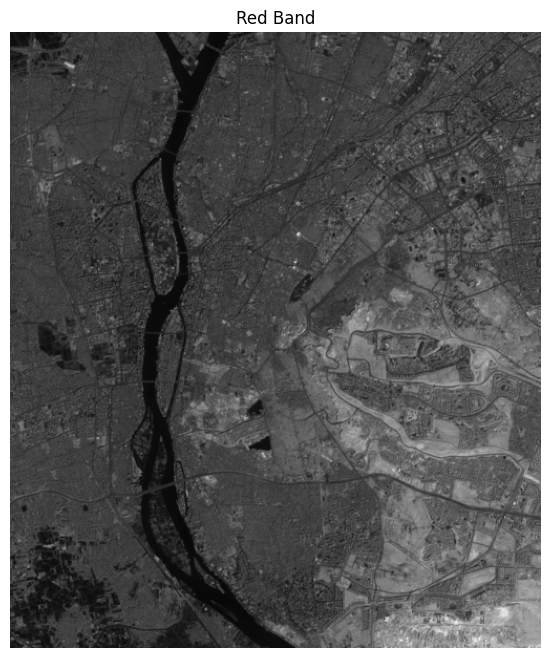

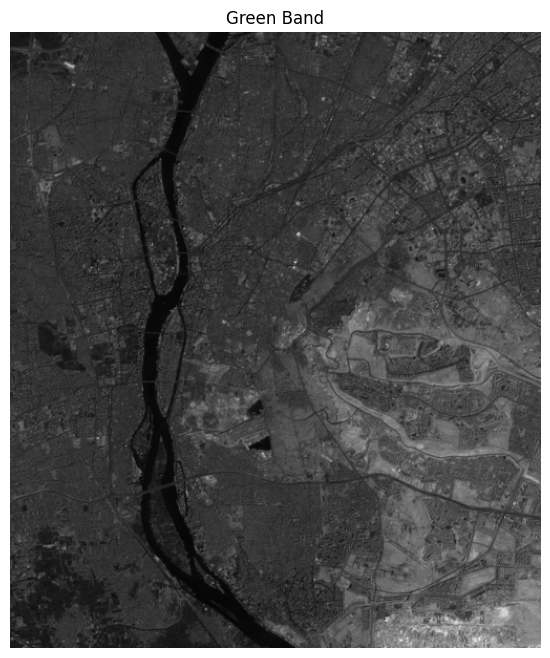

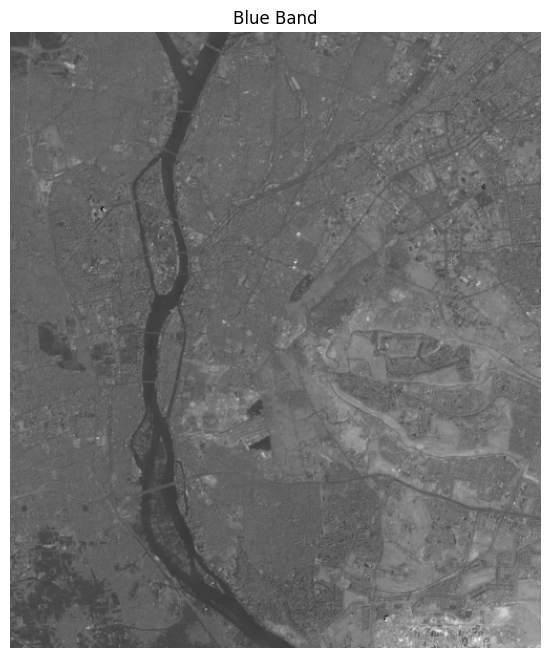

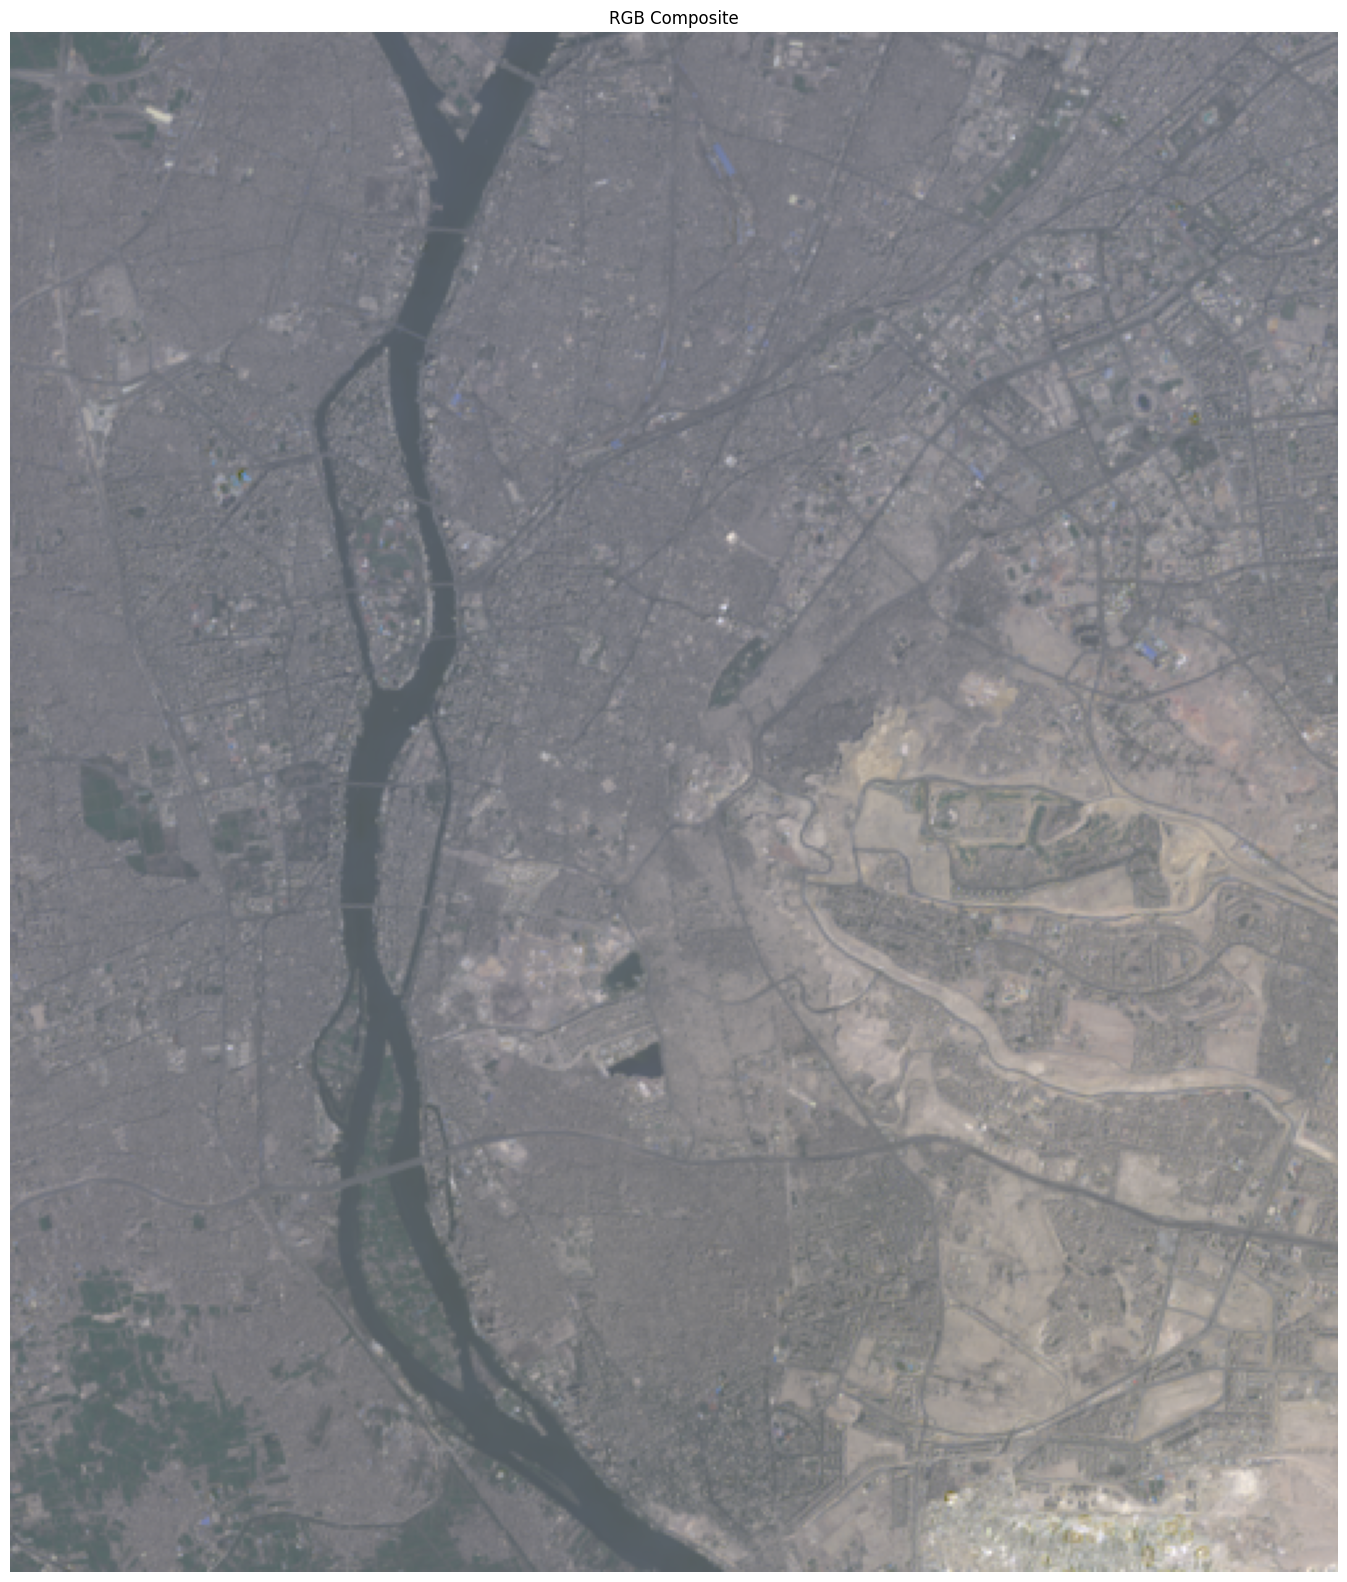

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract RGB bands
red = da.sel(band="red").values
green = da.sel(band="green").values
blue = da.sel(band="blue").values

# Normalize the bands for display
red_norm = red / red.max()
green_norm = green / green.max()
blue_norm = blue / blue.max()

# Stack into an RGB image
rgb_image = np.dstack((red_norm, green_norm, blue_norm))

# Define the bands and their names for iteration
bands = {"Red Band": red_norm, "Green Band": green_norm, "Blue Band": blue_norm}

# Plot each band
for band_name, band_data in bands.items():
    plt.figure(figsize=(8, 8))
    plt.imshow(band_data, cmap="gray")
    plt.title(band_name)
    plt.axis("off")
    plt.show()

# Plot the RGB composite
plt.figure(figsize=(20, 20))
plt.imshow(rgb_image)
plt.title("RGB Composite")
plt.axis("off")
plt.show()